In [10]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("dataset_incendios.utf8.csv", sep=";", decimal=".") 
data.head()

,pais_id,pais,provincia_id,provincia,departamento_id,departamento,sup_afectada,uni_med_id,cant_focos,año_inicial,año_final
0,32,Argentina,6,Buenos Aires,833,Tres Arroyos,2400.0,ha,1,2014,2014
1,32,Argentina,14,Córdoba,14,Calamuchita,50.0,ha,1,2015,2015
2,32,Argentina,18,Corrientes,56,General Alvear,257.0,ha,1,2012,2012
3,32,Argentina,18,Corrientes,28,Concepción,130.0,ha,2,2012,2012
4,32,Argentina,18,Corrientes,28,Concepción,5.0,ha,1,2013,2013


In [2]:
data.describe()

,pais_id,provincia_id,departamento_id,sup_afectada,cant_focos,año_inicial,año_final
count,120.0,120.000000,120.000000,118.000000,120.000000,120.000000,120.000000
mean,32.0,41.233333,62.575000,121.004860,8.208333,2013.125000,2013.400000
std,0.0,18.003143,82.778804,323.246491,22.979675,1.273931,1.272858
min,32.0,6.000000,7.000000,0.001500,0.000000,2011.000000,2012.000000
25%,32.0,26.000000,21.000000,2.565000,1.000000,2012.000000,2012.000000
50%,32.0,38.000000,45.500000,12.975000,1.000000,2013.000000,2013.000000
75%,32.0,54.000000,84.000000,93.750000,4.000000,2014.000000,2014.250000
max,32.0,90.000000,833.000000,2400.000000,167.000000,2015.000000,2016.000000


In [11]:
provincias_con_incendios = data.groupby(['provincia']).groups.keys()

focos_por_provincia        = data.groupby('provincia')['cant_focos'].sum()
hectareas_por_provincia    = data.groupby('provincia')['sup_afectada'].sum()

focos_por_departamento     = data.groupby(['provincia', 'departamento'])['cant_focos'].sum()
hectareas_por_departamento = data.groupby(['provincia', 'departamento'])['sup_afectada'].sum()

In [12]:

focos_por_provincia

provincia
Buenos Aires      1
Chubut          126
Corrientes       55
Córdoba           1
Entre Ríos       12
Jujuy            62
La Pampa          3
Mendoza          80
Misiones         10
Neuquén          86
Río Negro       543
San Juan          2
Tucuman           4
Name: cant_focos, dtype: int64

In [13]:
hectareas_por_provincia

provincia
Buenos Aires    2400.0000
Chubut           513.0100
Corrientes      5439.5500
Córdoba           50.0000
Entre Ríos       594.0000
Jujuy           2721.4300
La Pampa          25.0000
Mendoza         1094.0000
Misiones         679.0000
Neuquén          656.2235
Río Negro         99.3600
San Juan           5.0000
Tucuman            2.0000
Name: sup_afectada, dtype: float64

In [8]:
focos_por_provincia_ordenados = focos_por_provincia.reset_index().sort_values('cant_focos', ascending=False)
focos_por_provincia_ordenados

,provincia,cant_focos
10,Río Negro,543
1,Chubut,126
9,Neuquén,86
7,Mendoza,80
5,Jujuy,62
2,Corrientes,55
4,Entre Ríos,12
8,Misiones,10
12,Tucuman,4
6,La Pampa,3


In [9]:
focos_por_departamento_ordenados = focos_por_departamento.reset_index().sort_values('cant_focos', ascending=False)
focos_por_departamento_ordenados

,provincia,departamento,cant_focos
56,Río Negro,Bariloche,543
2,Chubut,Futaleufú,79
34,Mendoza,General Alvear,67
51,Neuquén,Lacar,59
1,Chubut,Cushamen,42
25,Jujuy,Dr Manuel Belgrano,28
17,Corrientes,Santo Tomé,25
28,Jujuy,Palpalá,18
35,Mendoza,San Rafael,13
20,Entre Ríos,Concordia,8


In [27]:
hectareas_por_provincia_ordenados = hectareas_por_provincia.reset_index().sort_values('sup_afectada', ascending=False)
hectareas_por_provincia_ordenados

,provincia,sup_afectada
2,Corrientes,5439.5500
5,Jujuy,2721.4300
0,Buenos Aires,2400.0000
7,Mendoza,1094.0000
8,Misiones,679.0000
9,Neuquén,656.2235
4,Entre Ríos,594.0000
1,Chubut,513.0100
10,Río Negro,99.3600
3,Córdoba,50.0000


In [138]:
hectareas_por_departamento_ordenados = hectareas_por_departamento.reset_index().sort_values('sup_afectada', ascending=False)
hectareas_por_departamento_ordenados.head()

NameError: name 'hectareas_por_departamento' is not defined

In [7]:
temperaturas = pd.read_csv("temperaturas.provincias.utf8.csv", sep=";", decimal=".") 
temperaturas

,Provincia,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,Buenos Aires,JUNÍN AERO,temperatura,23.0,21.7,19.7,15.8,12.4,9.3,8.6,10.7,12.9,16.3,19.4,22.0
1,Chubut,ESQUEL AERO,temperatura,15.1,15.0,12.3,8.2,4.9,2.4,1.5,3.2,5.5,8.4,11.2,13.6
2,Corrientes,CORRIENTES AERO,temperatura,27.0,26.0,24.7,21.4,18.0,15.9,15.2,17.0,18.5,21.8,23.7,25.8
3,Córdoba,CÓRDOBA AERO,temperatura,23.4,22.2,20.7,17.2,13.7,10.7,10.0,12.5,14.9,18.6,20.9,22.9
4,Entre Ríos,GUALEGUAYCHÚ AERO,temperatura,25.1,23.7,22.0,17.8,14.2,11.3,10.7,12.8,14.7,18.0,20.9,23.4
5,Jujuy,JUJUY AERO,temperatura,23.6,22.5,21.4,18.3,14.8,12.2,11.9,15.0,17.8,21.7,23.0,23.8
6,La Pampa,SANTA ROSA AERO,temperatura,23.6,22.1,19.5,14.9,11.0,7.9,7.2,9.5,12.1,15.9,19.4,22.5
7,Mendoza,SAN RAFAEL AERO,temperatura,23.3,22.0,19.3,14.5,10.5,7.7,6.9,9.0,11.8,16.3,19.6,22.4
8,Misiones,IGUAZÚ AERO,temperatura,25.6,24.9,24.2,21.4,17.6,15.9,15.7,17.6,19.1,21.9,23.5,25.0
9,Neuquén,NEUQUÉN AERO,temperatura,23.7,22.3,18.9,13.4,9.2,6.6,5.8,8.1,11.4,15.6,19.4,22.4


/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


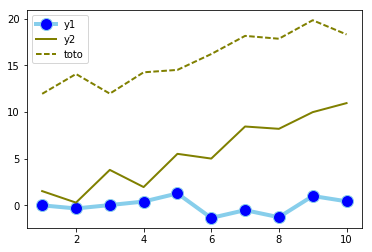

In [15]:
# multiple line plot
import numpy as np
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
df
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

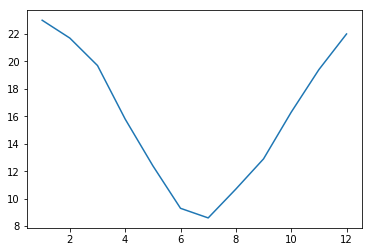

In [28]:
x = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
x = range(1,13)
y = temperaturas.iloc[0,3:].values.tolist()
df=pd.DataFrame({'x': x, 'y': y})
plt.plot( 'x', 'y', data=df)

In [48]:
#temperaturas_t = temperaturas.T
#temperaturas_t.rename(columns={'A': 'a'}, index={'ONE': 'one'})
#temperaturas_t.to_csv("temperaturas_t.csv")

temperaturas = pd.read_csv("temperaturas_t.csv", sep=",", decimal=".")
temperaturas

,Mes,Buenos Aires,Chubut,Corrientes,Cordoba,Entre Rios,Jujuy,La Pampa,Mendoza,Misiones,Neuquen,Rio Negro,San Juan,Tucuman
0,Ene,23.0,15.1,27.0,23.4,25.1,23.6,23.6,23.3,25.6,23.7,15.0,27.1,25.2
1,Feb,21.7,15.0,26.0,22.2,23.7,22.5,22.1,22.0,24.9,22.3,14.8,25.5,24.0
2,Mar,19.7,12.3,24.7,20.7,22.0,21.4,19.5,19.3,24.2,18.9,11.9,22.8,22.6
3,Abr,15.8,8.2,21.4,17.2,17.8,18.3,14.9,14.5,21.4,13.4,7.9,17.2,19.2
4,May,12.4,4.9,18.0,13.7,14.2,14.8,11.0,10.5,17.6,9.2,4.9,12.2,15.7
5,Jun,9.3,2.4,15.9,10.7,11.3,12.2,7.9,7.7,15.9,6.6,2.9,8.3,12.7
6,Jul,8.6,1.5,15.2,10.0,10.7,11.9,7.2,6.9,15.7,5.8,2.1,7.7,12.2
7,Ago,10.7,3.2,17.0,12.5,12.8,15.0,9.5,9.0,17.6,8.1,3.0,10.6,14.9
8,Sep,12.9,5.5,18.5,14.9,14.7,17.8,12.1,11.8,19.1,11.4,5.1,14.4,17.8
9,Oct,16.3,8.4,21.8,18.6,18.0,21.7,15.9,16.3,21.9,15.6,8.0,19.8,21.8


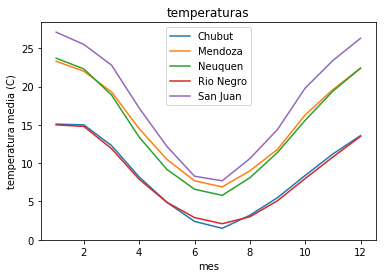

In [61]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})
plt.plot('mes', 'Chubut'      , data=t)
plt.plot('mes', 'Mendoza'     , data=t)
plt.plot('mes', 'Neuquen'     , data=t)
plt.plot('mes', 'Rio Negro'   , data=t)
plt.plot('mes', 'San Juan'    , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura media (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('temperaturas_sur.png')
#plt.show()

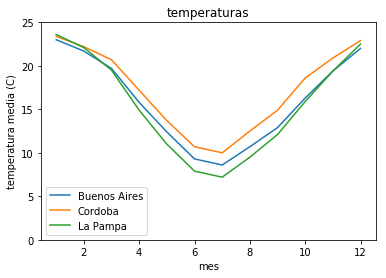

In [63]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})
plt.plot('mes', 'Buenos Aires', data=t)
plt.plot('mes', 'Cordoba'     , data=t)
plt.plot('mes', 'La Pampa'    , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura media (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('temperaturas_centro.png')
#plt.show()

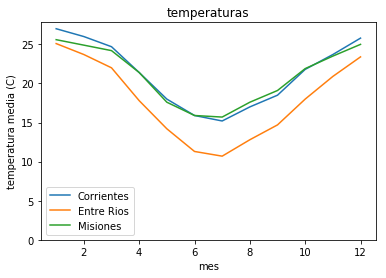

In [64]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})
plt.plot('mes', 'Corrientes', data=t)
plt.plot('mes', 'Entre Rios'  , data=t)
plt.plot('mes', 'Misiones'    , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura media (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('temperaturas_este.png')
#plt.show()

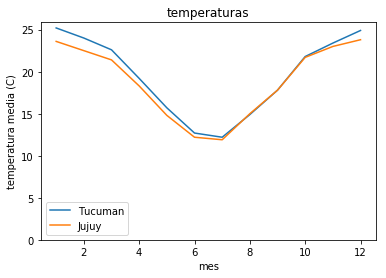

In [65]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})
plt.plot('mes', 'Tucuman', data=t)
plt.plot('mes', 'Jujuy'  , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura media (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('temperaturas_norte.png')
#plt.show()

In [136]:
causas = pd.read_csv("causas.csv", sep=";", decimal=".")
causas.head()

,incendio_anio,incendio_provincia,incendio_total_numero,incendio_negligencia_numero,incendio_intencional_numero,incendio_natural_numero,incendio_desconocida_numero
0,2011,Buenos Aires,1174,95,66,96,917
1,2011,Catamarca,38,1,0,0,37
2,2011,Chaco,529,70,9,10,440
3,2011,Chubut,169,54,44,5,66
4,2011,Ciudad Aut�noma de Buenos Aires,3,0,0,0,3


In [137]:
intencional_por_provincia = causas.groupby('incendio_provincia')['incendio_intencional_numero'].sum()
negligencia_por_provincia = causas.groupby('incendio_provincia')['incendio_negligencia_numero'].sum()
natural_por_provincia = causas.groupby('incendio_provincia')['incendio_natural_numero'].sum()
intencional_por_provincia.head(), negligencia_por_provincia.head(), natural_por_provincia.head()

(incendio_provincia
 Buenos Aires                       300
 Catamarca                           86
 Chaco                               12
 Chubut                             211
 Ciudad Aut�noma de Buenos Aires      0
 Name: incendio_intencional_numero, dtype: int64, incendio_provincia
 Buenos Aires                       557
 Catamarca                           74
 Chaco                               80
 Chubut                             196
 Ciudad Aut�noma de Buenos Aires      2
 Name: incendio_negligencia_numero, dtype: int64, incendio_provincia
 Buenos Aires                       229
 Catamarca                            6
 Chaco                               15
 Chubut                              12
 Ciudad Aut�noma de Buenos Aires      0
 Name: incendio_natural_numero, dtype: int64)

In [82]:
causas = pd.read_csv("causas.por.provincia.csv", sep=";")
causas['humana'] = causas['intencional'] + causas['negligencia']
causas.to_csv('causas.por.provincia.natural.o.humana.csv')

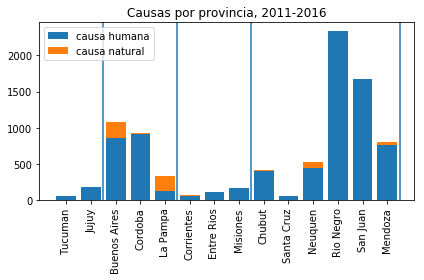

In [140]:
causas = pd.read_csv("causas.por.provincia.natural.o.humana.csv")

width = 0.8

causa_humana = plt.bar(causas.provincia.index, causas.humana, width)
causa_natural = plt.bar(causas.provincia.index, causas.natural, width, bottom=causas.humana)

plt.axvline(1.5, 0, 1, label='norte')
plt.axvline(4.5, 0, 1, label='centro')
plt.axvline(7.5, 0, 1, label='este')
plt.axvline(13.5, 0, 1, label='sur')
plt.title('Causas por provincia, 2011-2016')
plt.xticks(causas.provincia.index, causas.provincia.values.tolist(), rotation=90)
plt.legend((causa_humana[0], causa_natural[0]), ('causa humana', 'causa natural'))
plt.tight_layout()
plt.savefig("causas.png", bbox_inches='tight')
#plt.show()

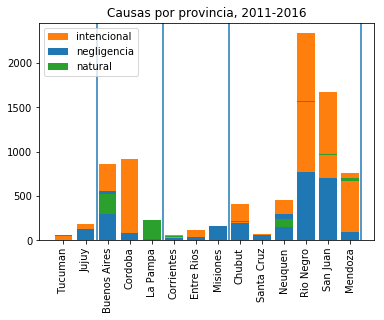

In [141]:
causas = pd.read_csv("causas.por.provincia.natural.o.humana.csv")

width = 0.8

negligencia = plt.bar(causas.provincia.index, causas.negligencia, width)
intencional = plt.bar(causas.provincia.index, causas.intencional, width, bottom=causas.negligencia)
natural     = plt.bar(causas.provincia.index, causas.natural, width, bottom=causas.intencional)

plt.axvline(1.5, 0, 1, label='norte')
plt.axvline(4.5, 0, 1, label='centro')
plt.axvline(7.5, 0, 1, label='este')
plt.axvline(13.5, 0, 1, label='sur')
plt.title('Causas por provincia, 2011-2016')
plt.xticks(causas.provincia.index, causas.provincia.values.tolist(), rotation=90)
plt.legend((intencional[0], negligencia[0], natural[0]), ('intencional', 'negligencia', 'natural'))
plt.savefig("causas.2.png", bbox_inches='tight')
plt.show()

In [121]:
maxtemp = pd.read_csv("maxtemp.csv", sep=";", decimal=".")
maxtemp.T.to_csv("maxtemp_t.csv")

In [122]:
temperaturas = pd.read_csv("maxtemp_t.csv", sep=",", decimal=".")
temperaturas

,mes,Buenos Aires,Chubut,Corrientes,Cordoba,Entre Rios,Jujuy,La Pampa,Mendoza,Misiones,Neuquen,Rio Negro,San Juan,Tucuman
0,ene,29.8,21.7,33.2,22.9,31.6,30.0,31.0,31.1,31.8,31.9,22.6,34.9,31.0
1,feb,28.4,22.2,31.9,21.8,29.8,28.8,29.8,30.0,31.2,30.6,23.0,33.4,29.7
2,mar,26.6,19.1,30.6,20.1,28.2,27.2,26.9,27.0,30.7,27.0,19.7,30.3,27.9
3,abr,22.6,14.4,26.8,16.3,23.9,24.0,22.4,22.5,27.5,21.6,14.6,25.2,24.6
4,may,19.0,10.1,23.4,12.7,20.2,21.3,18.0,18.5,23.5,16.5,10.2,20.5,21.2
5,jun,15.5,6.7,21.0,9.7,17.1,19.7,14.7,15.8,21.7,12.9,6.9,16.9,18.6
6,jul,15.0,6.1,21.1,8.9,16.7,20.3,14.2,15.2,22.2,12.9,6.7,16.5,19.3
7,ago,17.7,8.5,23.4,11.0,19.2,23.3,17.2,17.6,24.7,15.9,8.3,19.9,22.8
8,sep,19.7,11.8,24.9,13.6,20.6,25.7,19.7,19.8,25.8,18.9,11.5,23.2,25.4
9,oct,22.7,14.7,27.9,17.4,24.0,29.0,23.1,24.2,28.3,23.2,14.8,28.1,28.9


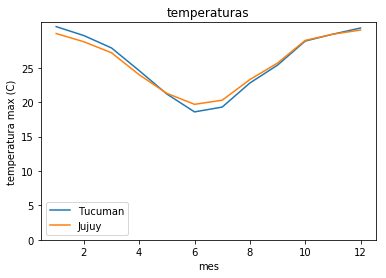

In [123]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']
})
plt.plot('mes', 'Tucuman', data=t)
plt.plot('mes', 'Jujuy'  , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura max (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('maxtemp_norte.png')
#plt.show()

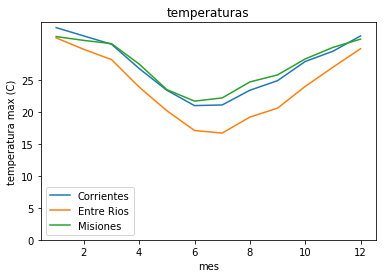

In [124]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})
plt.plot('mes', 'Corrientes', data=t)
plt.plot('mes', 'Entre Rios'  , data=t)
plt.plot('mes', 'Misiones'    , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura max (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('maxtemp_este.png')
#plt.show()

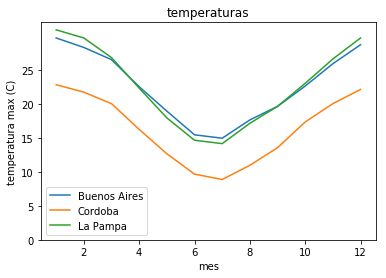

In [125]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})
plt.plot('mes', 'Buenos Aires', data=t)
plt.plot('mes', 'Cordoba'     , data=t)
plt.plot('mes', 'La Pampa'    , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura max (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('maxtemp_centro.png')
#plt.show()

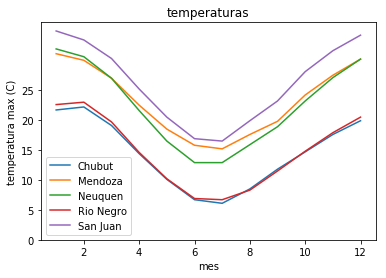

In [126]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})
plt.plot('mes', 'Chubut'      , data=t)
plt.plot('mes', 'Mendoza'     , data=t)
plt.plot('mes', 'Neuquen'     , data=t)
plt.plot('mes', 'Rio Negro'   , data=t)
plt.plot('mes', 'San Juan'    , data=t)
plt.title('temperaturas')
plt.xlabel('mes')
plt.ylabel('temperatura max (C)')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('maxtemp_sur.png')
#plt.show()

In [127]:
lluvia = pd.read_csv("lluvia.csv", sep=";", decimal=".")
lluvia.T.to_csv("lluvia_t.csv")

In [128]:
temperaturas = pd.read_csv("lluvia_t.csv", sep=",", decimal=".")
temperaturas

,mes,Buenos Aires,Chubut,Corrientes,Cordoba,Entre Rios,Jujuy,La Pampa,Mendoza,Misiones,Neuquen,Rio Negro,San Juan,Tucuman
0,ene,132.3,18.8,167.3,144.5,109.6,153.2,94.6,61.0,177.7,12.9,20.0,15.7,230.6
1,feb,118.8,18.4,161.9,90.6,102.5,152.9,81.0,42.8,154.7,11.9,15.3,18.9,172.3
2,mar,133.2,24.5,175.1,107.8,131.6,138.9,102.3,37.2,126.5,23.6,35.2,11.2,151.1
3,abr,109.1,43.1,206.6,64.7,113.9,49.4,58.0,26.1,169.1,15.3,58.9,4.4,62.5
4,may,61.2,65.0,91.9,31.5,82.7,11.6,32.9,15.6,192.7,21.1,130.1,4.4,25.9
5,jun,26.8,79.4,70.5,8.4,56.0,2.8,15.5,9.1,148.3,23.5,170.1,1.6,13.1
6,jul,31.5,60.2,37.5,14.5,50.6,3.4,21.5,13.2,115.8,15.9,122.1,3.5,7.4
7,ago,32.4,47.0,47.2,13.9,54.4,3.1,28.1,16.0,94.2,11.4,101.4,3.2,8.5
8,sep,55.3,35.7,75.7,40.1,71.0,5.4,50.9,27.4,160.3,19.3,56.5,5.6,16.1
9,oct,122.8,28.3,150.7,75.4,110.1,28.1,74.7,30.5,237.0,20.3,49.4,3.6,65.1


In [135]:
t = pd.DataFrame({
'mes': range(1,13), 
'Buenos Aires' : temperaturas['Buenos Aires'], 
'Chubut'       : temperaturas['Chubut'],       
'Corrientes'   : temperaturas['Corrientes'],   
'Cordoba'      : temperaturas['Cordoba'],      
'Entre Rios'   : temperaturas['Entre Rios'],   
'Jujuy'	       : temperaturas['Jujuy'],        
'La Pampa'     : temperaturas['La Pampa'],     
'Mendoza'      : temperaturas['Mendoza'],      
'Misiones'     : temperaturas['Misiones'],     
'Neuquen'      : temperaturas['Neuquen'],      
'Rio Negro'    : temperaturas['Rio Negro'],    
'San Juan'     : temperaturas['San Juan'],     
'Tucuman'      : temperaturas['Tucuman']   
})

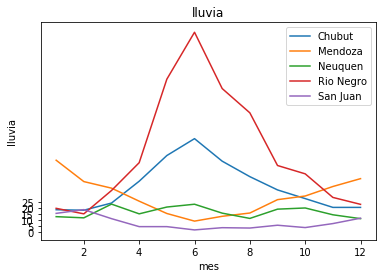

In [131]:
plt.plot('mes', 'Chubut'      , data=t)
plt.plot('mes', 'Mendoza'     , data=t)
plt.plot('mes', 'Neuquen'     , data=t)
plt.plot('mes', 'Rio Negro'   , data=t)
plt.plot('mes', 'San Juan'    , data=t)
plt.title('lluvia')
plt.xlabel('mes')
plt.ylabel('lluvia')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('lluvia_sur.png')

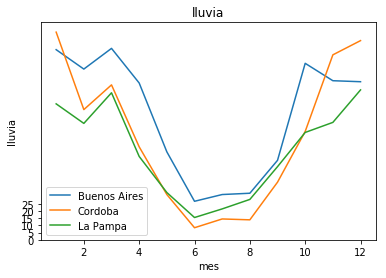

In [132]:
plt.plot('mes', 'Buenos Aires', data=t)
plt.plot('mes', 'Cordoba'     , data=t)
plt.plot('mes', 'La Pampa'    , data=t)
plt.title('lluvia')
plt.xlabel('mes')
plt.ylabel('lluvia')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('lluvia_centro.png')

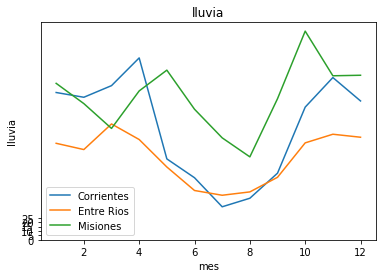

In [133]:
plt.plot('mes', 'Corrientes', data=t)
plt.plot('mes', 'Entre Rios'  , data=t)
plt.plot('mes', 'Misiones'    , data=t)
plt.title('lluvia')
plt.xlabel('mes')
plt.ylabel('lluvia')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('lluvia_este.png')

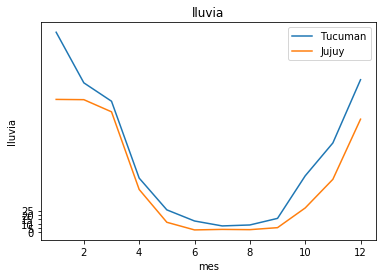

In [134]:
plt.plot('mes', 'Tucuman', data=t)
plt.plot('mes', 'Jujuy'  , data=t)
plt.title('lluvia')
plt.xlabel('mes')
plt.ylabel('lluvia')
plt.legend()
plt.yticks(np.arange(0, 30, 5)) 
plt.savefig('lluvia_norte.png')